In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../DATA/rock_density_xray.csv")

In [3]:
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [4]:
df.columns=['Signal',"Density"]

<AxesSubplot:xlabel='Signal', ylabel='Density'>

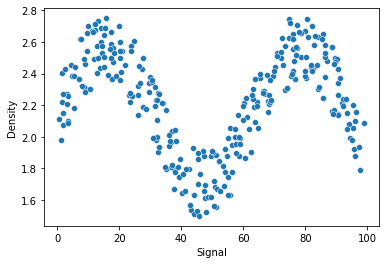

In [6]:
sns.scatterplot(x='Signal', y='Density', data=df)

In [13]:
X = df['Signal'].values.reshape(-1,1)  
y = df['Density']

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
lr_model = LinearRegression()

In [18]:
lr_model.fit(X_train,y_train)

LinearRegression()

In [19]:
lr_preds = lr_model.predict(X_test)

In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [21]:
mean_absolute_error(y_test,lr_preds)

0.211198973318633

In [22]:
np.sqrt(mean_squared_error(y_test,lr_preds))

0.2570051996584629

In [23]:
signal_range = np.arange(0,100)
lr_output = lr_model.predict(signal_range.reshape(-1,1))

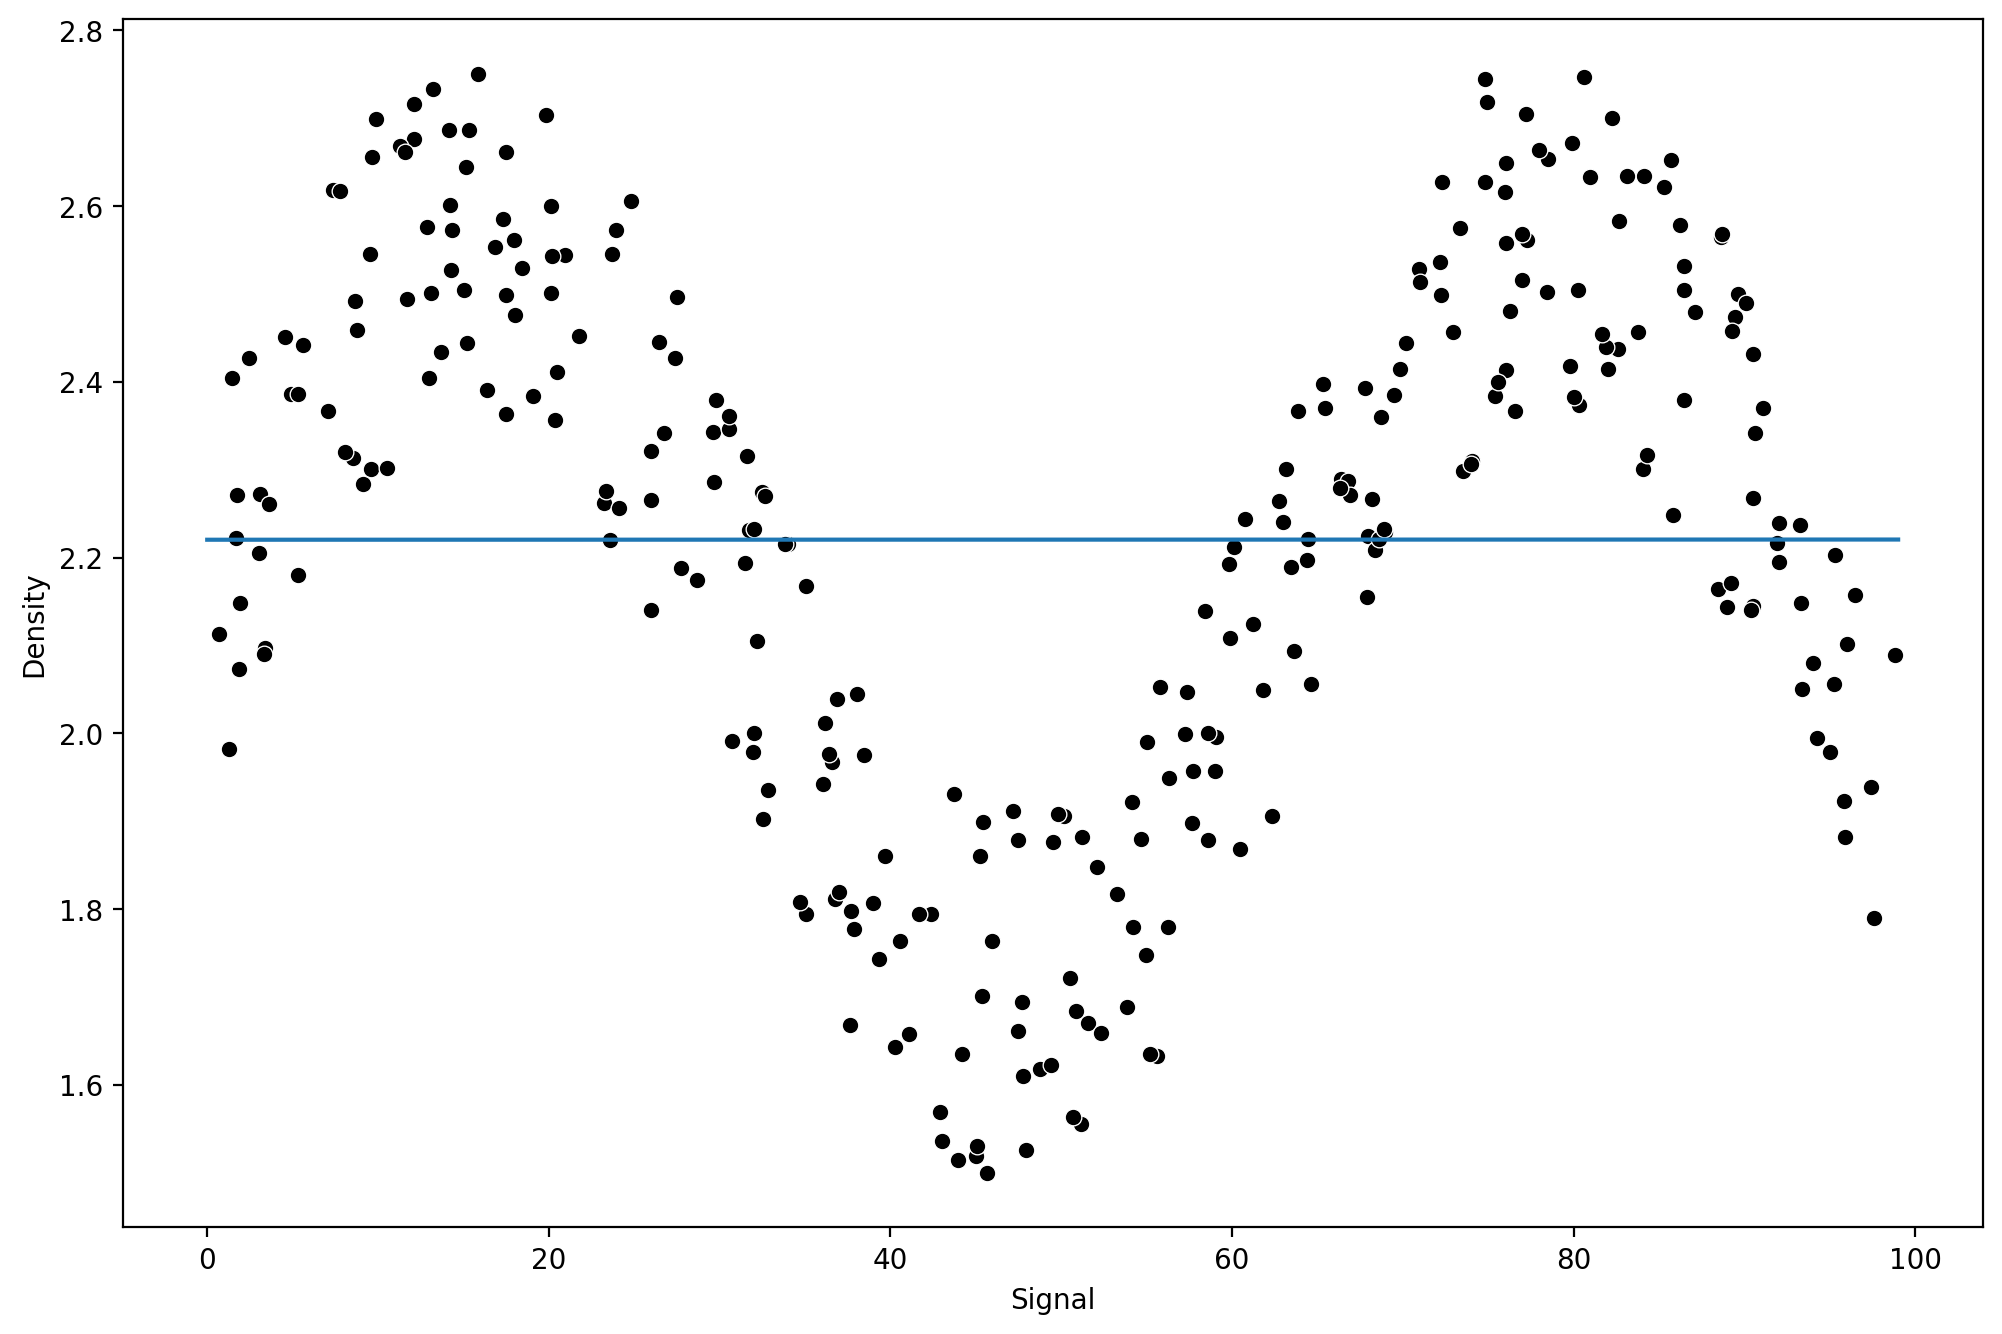

In [24]:
plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot(x='Signal',y='Density',data=df,color='black')
plt.plot(signal_range,lr_output)